# Exercise 3: Fourier properties

With this exercise you will get a better understanding of some of the Fourier theorems and of some useful properties of the DFT. You will write code to implement and verify several properties of the DFT that are discussed in the lectures. You will also learn to use the `dftModel.py` module of sms-tools, which contains the basic python functions implementing the DFT. There are five parts in the exercise: 1) Minimize energy spread in DFT of sinusoids, 2) Symmetry properties of the DFT, 3) Suppressing frequency components using DFT model, and 4) FFT size and zero-padding. 

### Relevant Concepts

__DFT of sinusoids:__ When a real sinusoid has an integer number of cycles in $N$ samples, the frequency of the sinusoid exactly matches one of the bin frequencies in an $N$ point DFT. Hence the DFT spectrum of the sinusoid has a value of zero at every DFT bin except at the two bins that match the frequency of the sinusoid. Otherwise, the energy of the sinusoid is spread over all the bins. When there are multiple sinusoids, the equations extend to each sinusoid. 

\begin{eqnarray}
 x[n]&=&A_{0}\cos\left(2\pi k_{0}n/N\right)=\frac{A_{0}}{2}{\textstyle e}^{j2\pi k_{0}n/N}+\frac{A_{0}}{2}{\textstyle e}^{-j2\pi k_{0}n/N}\\
 X[k] &=& \frac{A_0}{2} \,\,\, \mathrm{for} \,\,\, k = k_0, -k_0; \,\,\,\, 0 \,\,\,\mathrm{otherwise}
\end{eqnarray}

__Zero-padding:__ Zero-padding a signal is done by adding zeros at the end of the signal. If we perform zero-padding to a signal before computing its DFT, the resulting spectrum will be an interpolated version of the spectrum of the original signal.  In most implementations of the DFT (including the FFT algorithms) when the DFT size is larger than the length of the signal, zero-padding is implicitly done. 

__Zero phase windowing:__ Zero phase windowing of a frame of a signal puts the centre of the signal at the zero time index for DFT computation. By moving the centre of the frame to zero index by a circular shift, the computed DFT will not have the phase offset which would have otherwise been introduced (recall that a shift of the signal causes the DFT to be multiplied by a complex exponential, which keeps the magnitude spectrum intact but changes the phase spectrum). When used in conjunction with zero-padding, zero phase windowing is also useful for the creation of a frame of length of power of 2 for FFT computation (`fftbuffer`). 

If the length of the signal $x$ is $M$ and the required DFT size is $N$, the zero phase windowed version of the signal, `dftbuffer`, for DFT computation can be obtained by (works for both even and odd $M$): 

    hM1 = floor((M+1)/2)
    hM2 = floor(M/2)
    dftbuffer = zeros(N)
    dftbuffer[:hM1] = x[hM2:]                              
    dftbuffer[-hM2:] = x[:hM2]

__Real, even and odd signals:__ A signal is real when it does not have any imaginary component, and all sounds are real signals. A signal $x$ is even if $x[n] = x[-n]$, and odd if $x[n] = -x[-n]$. For a signal of length $M$ (and $M$ is odd), in the context of a zero phase windowed signal and its DFT, the signal is even if $x[n] = x[M-n]$ and odd if $x[n] = -x[M-n]$, $1 \leq n \leq M-1$. The DFT properties show that for real input signals, the magnitude spectrum is even and the phase spectrum is odd. Furthermore, when the input signal is both real and even, the DFT is real valued, with an even magnitude spectrum and imaginary component equal to zero. In summary, if $x$ is an input signal of length $M$ ($M$ is odd) and $X = \mathrm{DFT}(x,M)$, then for $1 \leq k \leq M-1$

If $x$ is real, $\left|X[k]\right| = \left|X[M-k]\right|$ and $\boldsymbol{<}\!X[k] = -\boldsymbol{<}\!X[M-k]$

If $x$ is real and even, $\left|X[k]\right| = \left|X[M-k]\right|$ and $\mathrm{imag}(X[k]) = 0$


__Positive half of the DFT spectrum:__ Audio signals are real signals. Due to the symmetry properties of the DFT of a real signal, it is sufficient to store only one half of the magnitude and phase spectra. To save on both storage and computation, we will just store just the half spectrum when possible. 

From an $N$ point DFT ($N$ even), we can obtain the positive half of the spectrum by considering only the first $(N/2)+1$ samples of the DFT. We can compute the magnitude spectrum of the positive half (in dB) as $m_X = 20\log_{10}\left|X[0:(N/2)+1]\right|$, where $X$ is the DFT of the input. 

__Filtering:__ Filtering involves selectively suppressing certain frequencies present in the signal. Filtering is often performed in the time domain by the convolution of the input signal with the impulse response of a filter. The same operation can also be done in the DFT domain using the properties of DFT, by multiplying the DFT of the input signal by the DFT of the impulse response of the filter. In this assignment, we will consider a very simple illustrative filter that suppresses some frequency components by setting some DFT coefficients to zero. It is to be noted that the convolution operation here is circular convolution with a period $N$, the size of the DFT. 

If $x_1[n] \Leftrightarrow X_1[k]$ and $x_2[n] \Leftrightarrow X_2[k]$, $x_1[n] * x_2[n] \Longleftrightarrow X_1[k]\,X_2[k]$


## Part 1 - Minimize energy spread in DFT of sinusoids

Given an input signal consisting of two sinusoids, the function `minimize_energy_spread_dft()` should select the first `M` samples from the signal and return the positive half of the DFT magnitude spectrum (in dB), such that it has only two non-zero values. 

`M` is to be calculated as the smallest positive integer for which the positive half of the DFT magnitude spectrum has only two non-zero values. To get the positive half of the spectrum, first compute the `M` point DFT of the input signal (for this you can use the `fft()` function of `scipy.fftpack`). Consider only the first `(M/2)+1` samples of the DFT, computing the magnitude spectrum of the positive half (in dB) as `mX = 20*log10(abs(X[:M/2+1]))`, where `X` is the DFT of the input signal.

The input arguments to this function are the input signal `x` (of length W >= M) consisting of two sinusoids of frequency `f1` and `f2`, the sampling frequency `fs` and the value of frequencies `f1` and `f2`. The function should return the positive half of the magnitude spectrum `mX`. For this question, you can assume the input frequencies `f1` and `f2` to be positive integers and factors of `fs`, and that `M` is even. 

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small values < 1e-12 (or -240 dB) in magnitude. For practical purposes, all values with absolute value less than 1e-6 (or -120 dB) can be considered to be zero. 

HINT: The DFT magnitude spectrum of a sinusoid has only one non-zero value (in the positive half of the DFT spectrum) when its frequency coincides with one of the DFT bin frequencies. This happens when the DFT size (`M` in this question) contains exactly an integer number of periods of the sinusoid. Since the signal in this question consists of two sinusoids, this condition should hold true for each of the sinusoids, so that the DFT magnitude spectrum has only two non-zero values, one per sinusoid. 

`M` can be computed as the Least Common Multiple (LCM) of the sinusoid periods (in samples). The LCM of two numbers `x`, `y` can be computed as: `x*y/gcd(x,y)`, where gcd denotes the greatest common divisor.

In [1]:
from scipy.fftpack import fft, fftshift
import numpy as np
from math import gcd, ceil, floor
import sys
sys.path.append('../software/models/')
from dftModel import dftAnal, dftSynth
from scipy.signal import get_window
import matplotlib.pyplot as plt

In [2]:
# E3 - 1.1: Complete the function minimize_energy_spread_dft()
    
def minimize_energy_spread_dft(x, fs, f1, f2):
    """ From a signal with two sinusoids compute its magnitude spectrum having only two non-zero value.
    
    Args:
        x (np.array): input signal 
        fs (float): sampling frequency in Hz
        f1 (float): frequency of first sinusoid component in Hz
        f2 (float): frequency of second sinusoid component in Hz
        
    Returns:
        np.array: positive half of magnitude spectrum (in dB)
        
    """
    ### Your code here
    
    T1_samples = int(fs/f1)                                         # Period in samples of first sinusoid component
    T2_samples = int(fs/f2)                                         # Period in samples of second sinusoid component
    M = int((T1_samples*T2_samples)/gcd(T1_samples, T2_samples))    # Compute M as the Least Common Multiple of both sinusoid periods in samples
    x1 = x[:M]                                                      # Select the first M samples of the input signal
    X = fft(x1)                                                     # Compute M-point DFT 
    hM = (M//2)+1                                                   # Size of positive spectrum, it includes sample 0
    mX = 20*np.log10(np.abs(X[:hM]))                                # Compute and return the positive half of the magnitude spectrum in dB
    return mX                                                  
    

Test cases for `minimize_energy_spread_dft()`:

_Test case 1:_ For an input signal `x` sampled at `fs = 10000`Hz that consists of sinusoids of frequencies `f1 = 80`Hz and `f2 = 200`Hz, you need to select `M = 250` samples of the signal to meet the required condition. In this case, output `mX` is 126 samples in length and has non-zero values at bin indices 2 and 5 (corresponding to the frequency values of 80 and 200 Hz, respectively). You can create a test signal `x` by generating and adding two sinusoids of the given frequencies.

_Test case 2:_ For an input signal `x` sampled at `fs = 48000` Hz that consists of sinusoids of frequencies `f1 = 300`Hz and `f2 = 800`Hz, you need to select `M = 480` samples of the signal to meet the required condition. In this case, output `mX` is 241 samples in length and has non-zero values at bin indices 3 and 8 (corresponding to the frequency values of 300 and 800 Hz, respectively). You can create a test signal `x` by generating and adding two sinusoids of the given frequencies.

M =  250
k1 =  2
k2 =  5


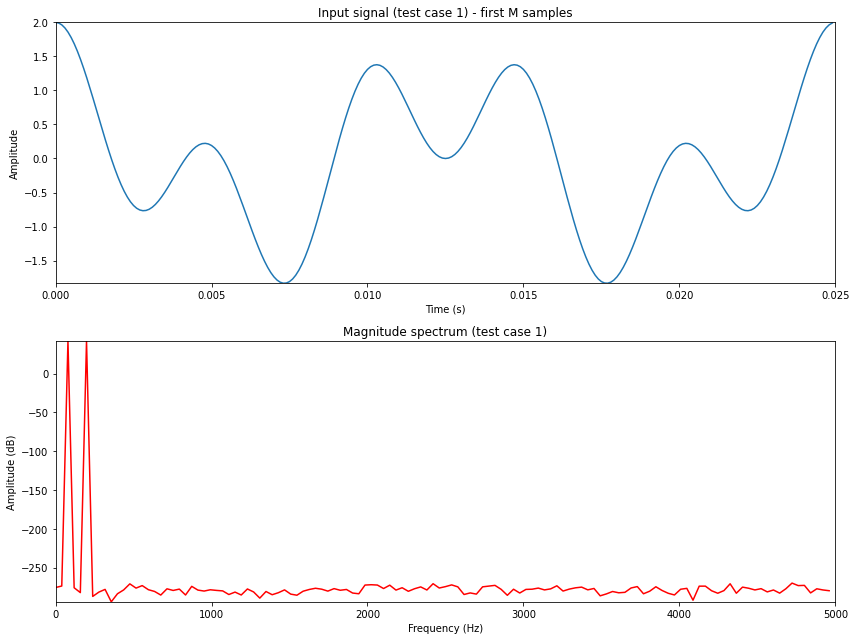

M =  480
k1 =  3
k2 =  8


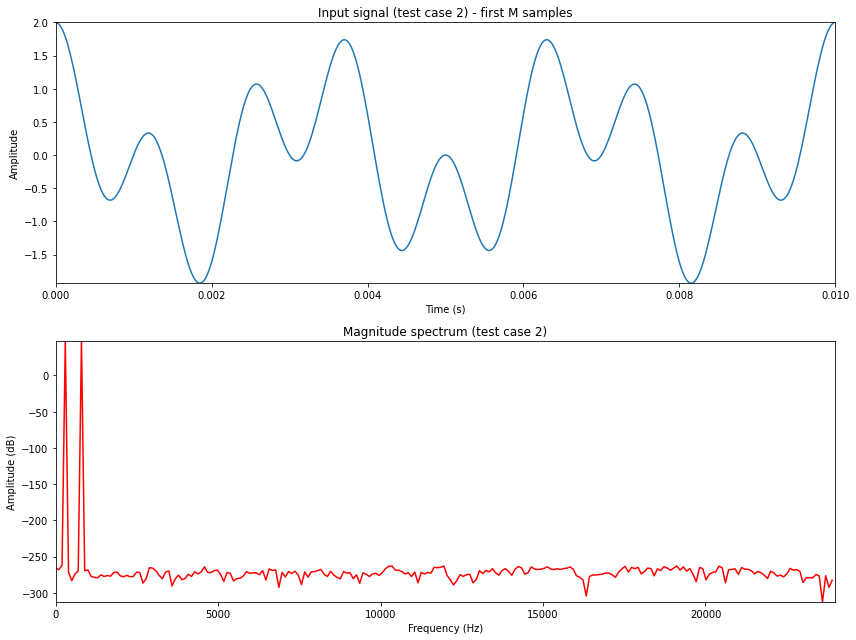

In [3]:
# E3 - 1.2: Compute and plot the two input signals proposed above, call the function minimize_energy_spread_dft(), 
# and plot the output magnitude spectra

### Your code here

# Test case 1
fs = 10000                                                                     # Sampling frequency (Hz)
f1 = 80                                                                        # Frequency of first sinusoid component (Hz)
f2 = 200                                                                       # Frequency of second sinusoid component (Hz)
W = 1000                                                                       # Total length of input signal (samples)
x = np.cos(2*np.pi*f1*np.arange(W)/fs) + np.cos(2*np.pi*f2*np.arange(W)/fs)    # Input signal test case 1
mX = minimize_energy_spread_dft(x, fs, f1, f2)                                 # Compute the positive half of the magnitude spectrum of x 
M = (len(mX)-1)*2                                                              # Check value of M
k1 = f1*M/fs                                                                   # Calculate position of the two non-zero magnitude spectrum values 
k2 = f2*M/fs
print("M = ", M)                                                               
print("k1 = ", int(k1))
print("k2 = ", int(k2))

plt.figure(figsize=(12,9))

# Plot the input signal - test case 1
plt.subplot(2,1,1)
plt.plot(np.arange(M)/float(fs), x[:M])
plt.axis([0, M/float(fs), min(x[:M]), max(x[:M])])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Input signal (test case 1) - first M samples')

# Plot magnitude spectra - test case 1
plt.subplot(2,1,2)
plt.plot((fs/2.0)*np.arange((M/2)+1)/float((M/2)+1), mX, 'r')
plt.axis([0, fs/2.0, min(mX), max(mX)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Magnitude spectrum (test case 1)')

plt.tight_layout()
plt.show()

# Test case 2
fs = 48000                                                                     # Sampling frequency (Hz)
f1 = 300                                                                       # Frequency of first sinusoid component (Hz)
f2 = 800                                                                       # Frequency of second sinusoid component (Hz)
W = 1000                                                                       # Total length of input signal (samples)
x = np.cos(2*np.pi*f1*np.arange(W)/fs) + np.cos(2*np.pi*f2*np.arange(W)/fs)    # Input signal test case 2
mX = minimize_energy_spread_dft(x, fs, f1, f2)                                 # Compute the positive half of the magnitude spectrum of x
M = (len(mX)-1)*2                                                              # Check value of M
k1 = f1*M/fs                                                                   # Calculate position of the two non-zero magnitude spectrum values 
k2 = f2*M/fs
print("M = ", M)
print("k1 = ", int(k1))
print("k2 = ", int(k2))

plt.figure(figsize=(12,9))

# Plot the input signal - test case 2
plt.subplot(2,1,1)
plt.plot(np.arange(M)/float(fs), x[:M])
plt.axis([0, M/float(fs), min(x[:M]), max(x[:M])])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Input signal (test case 2) - first M samples')

# Plot magnitude spectra - test case 2
plt.subplot(2,1,2)
plt.plot((fs/2.0)*np.arange((M/2)+1)/float((M/2)+1), mX, 'r')
plt.axis([0, fs/2.0, min(mX), max(mX)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Magnitude spectrum (test case 2)')

plt.tight_layout()
plt.show()

## Part 2 - Symmetry properties of the DFT

The function `test_real_even()` should check if the input signal is real and even using the symmetry properties of its DFT. The function will return the result of this test, the zero-phase windowed version of the input signal (`dftbuffer`), and its DFT. 

Given an input signal `x` of length `M`, do a zero phase windowing of `x` without any zero-padding. Then compute the `M` point DFT of the zero phase windowed signal and use the symmetry of the computed DFT to test if the input signal `x` is real and even. Return the result of the test, the `dftbuffer` computed, and the DFT of the `dftbuffer`. 

The input argument is a signal `x` of length `M`. The output is a tuple with three elements 
`(isRealEven, dftbuffer, X)`, where `isRealEven` is a boolean variable which is `True` if `x` is real and even, else `False`. `dftbuffer` is the `M` length zero phase windowed version of `x`. `X` is the `M` point DFT of the `dftbuffer`. 

To make the problem easier, we will use odd length input sequence in this question (`M` is odd). 

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small values < 1e-12 in magnitude. For practical purposes, all values with absolute value less than 1e-6 can be considered to be zero. Use an error tolerance of 1e-6 to compare if two floating point arrays are equal. 

Caveat: Use the imaginary part of the spectrum instead of the phase to check if the input signal is real and even.

In [4]:
# E3 - 2.1: Complete the function test_real_even()

def test_real_even(x):
    """check if x is real and even using the symmetry properties of its DFT.
    Args:
        x (np.array): input signal of length M (M is odd)
        
    Returns:
        tuple including:
        isRealEven (boolean): True if input x is real and even, and False otherwise
        dftbuffer (np.array): M point zero phase windowed version of x 
        X (np.array): M point DFT of dftbuffer 
        
    """
    ### Your code here
    
    M = x.size                                   # Size of input signal
    hM1 = int(floor((M+1)/2))                    # End value of first half of zero-phase windowed signal
    hM2 = int(floor(M/2))                        # Start value of second half of zero-phase windowed signal
    dftbuffer = np.zeros(M)                      # Initialize zero-phase windowed signal with size M
    dftbuffer[:hM1] = x[hM2:]                    # Do first half of zero-phase windowed signal
    dftbuffer[M-hM2:] = x[:hM2]                  # Do second half of zero-phase windowed signal
    X = fft(dftbuffer)                           # Compute M-point DFT of zero-phase windowed signal
    if all(abs(X.imag) < 1e-6):                  # If imaginary part of spectrum is zero -> signal is even and real
        isRealEven = True
    else:                                        # Otherwise is not even and real 
        isRealEven = False
    return (isRealEven, dftbuffer, X)            # Return tuple 


Test cases for `test_real_even()`:

_Test case 1:_ If `x = np.array([2, 3, 4, 3, 2])`, which is a real and even signal (after zero phase windowing), the function returns 

```
(True, array([ 4., 3., 2., 2., 3.]), array([14.0000+0.j, 2.6180+0.j, 
0.3820+0.j, 0.3820+0.j, 2.6180+0.j])) (values are approximate)
```

_Test case 2:_ If `x = np.array([1, 2, 3, 4, 1, 2, 3])`, which is not an even signal (after zero phase windowing), the function returns 

```
(False,  array([ 4.,  1.,  2.,  3.,  1.,  2.,  3.]), array([ 16.+0.j, 
2.+0.69j, 2.+3.51j, 2.-1.08j, 2.+1.08j, 2.-3.51j, 2.-0.69j])) (values are approximate)
```

To get a more realistic example use a longer input signal and plot the real and imaginary parts of the output spectrum `X`. For example, use `x = get_window('hanning', 51, fftbins=False)`, which is real an even, and plot `x`and the real and imaginary part of the spectrum `X`.


(True, array([4., 3., 2., 2., 3.]), array([14.        -0.j,  2.61803399+0.j,  0.38196601+0.j,  0.38196601-0.j,
        2.61803399-0.j]))
(False, array([4., 1., 2., 3., 1., 2., 3.]), array([16.-0.j        ,  2.+0.69589549j,  2.+3.51351879j,  2.-1.08208835j,
        2.+1.08208835j,  2.-3.51351879j,  2.-0.69589549j]))


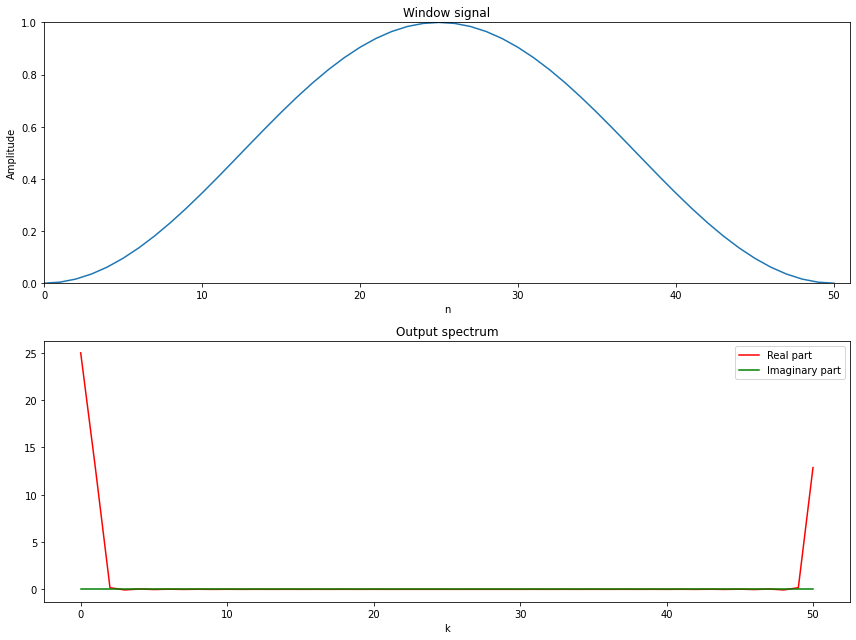

In [5]:
# E3 - 2.2: Plot the input signal proposed above (window signal), call the function test_real_even(), 
# and plot its output spectrum (real and imaginary)

### Your code here

# Test case 1
x = np.array([2, 3, 4, 3, 2])                                                # Generate test case 1 input signal 
print(test_real_even(x))                                                     # Print results returned by function test_real_even()

# Test case 2
x = np.array([1, 2, 3, 4, 1, 2, 3])                                          # Generate test case 2 input signal
print(test_real_even(x))                                                     # Print results returned by function test_real_even()

# Realistic example
x = get_window('hanning', 51, fftbins=False)                                 # Generate test window signal
M = x.size                                                                   # Get size of window signal

plt.figure(figsize=(12,9))

# Plot window signal
plt.subplot(2,1,1)
plt.plot(np.arange(M), x)
plt.axis([0, M, min(x), max(x)])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Window signal')

isRealEven, dftbuffer, X = test_real_even(x)                                 # Call test_real_even() function with the window signal as input

# Plot real and imaginary part of the spectrum X
plt.subplot(2,1,2)
plt.plot(np.arange(M), np.real(X), 'r', label='Real part')
plt.plot(np.arange(M), np.imag(X), 'g', label='Imaginary part')
plt.xlabel('k')
plt.legend()
plt.title('Output spectrum')

plt.tight_layout()
plt.show()


## Part 3 - Suppressing frequency components using DFT model

Given a signal as input, the function `supress_freq_dft_model()` should suppress the frequency components <= 70Hz using the DFT. It should return the filtered signal in the time domain.

Use the DFT to implement a very basic form of frequency domain filtering. Use the functions `dftAnal()` and `dftSynth()` provided in the `dftModel.py` module. 

Use `dftAnal()` to obtain the magnitude spectrum (in dB) and phase spectrum of the audio signal. Set the values of the magnitude spectrum that correspond to frequencies <= 70 Hz to -120dB (there may not be a bin corresponding exactly to 70Hz, choose the nearest bin of equal or higher frequency, e.g., using `np.ceil()`).

Use `dftSynth()` to synthesize the filtered output signal. Then return the filtered signal. 

Use a hamming window to smooth the signal. Hence, do not forget to scale the output signals by the sum of the window values (as done in `software/models_interface/dftModel_function.py`).  

Please note that this question is just for illustrative purposes and filtering is not usually done this way - such sharp cutoffs introduce artifacts in the output. 

The input is a `M` length signal `x`, sampling frequency is `fs` and the FFT size `N`. The output is the filtered signal.

In [6]:
# E3 - 3.1: Complete the function suppress_freq_dft_model()

def suppress_freq_dft_model(x, fs, N):
    """
    Args:
        x (np.array): input signal of length N (odd)
        fs (float): sampling frequency (Hz)
        N (int): FFT size
        
    Returns:
       np.array: output signal with filtering (N samples long)
    """
    M = len(x)
    w = get_window('hamming', M)
    outputScaleFactor = sum(w)
    
    ### Your code here
    
    mX, pX = dftAnal(x, w, N)                                         # Compute the DFT of the input signal
    
    k_70 = int(np.ceil(70*N/fs))                                      # Compute nearest frequency bin representing 70 Hz
    mX[:k_70+1] = -120                                                # Set magnitude spectrum of frequencies equal or below 70 Hz to -120 dB
    
    y = dftSynth(mX, pX, N)*outputScaleFactor                         # Compute the IDFT of the spectrum
    
    return y                                                          # Return output of the IDFT
    


Test case for the function `suppress_freq_dft_model()`:

_Test case 1:_ For an input signal with 40Hz, 100Hz, 200Hz, 1000Hz components, the output should only contain 100Hz, 200Hz and 1000Hz components. 

_Test case 2:_ For an input signal with 23Hz, 36Hz, 230Hz, 900Hz, 2300Hz components, the output should only contain 230Hz, 900Hz and 2300Hz components. 

To understand the effect of filtering, you can plot the magnitude spectra of the input and output signals superposed.

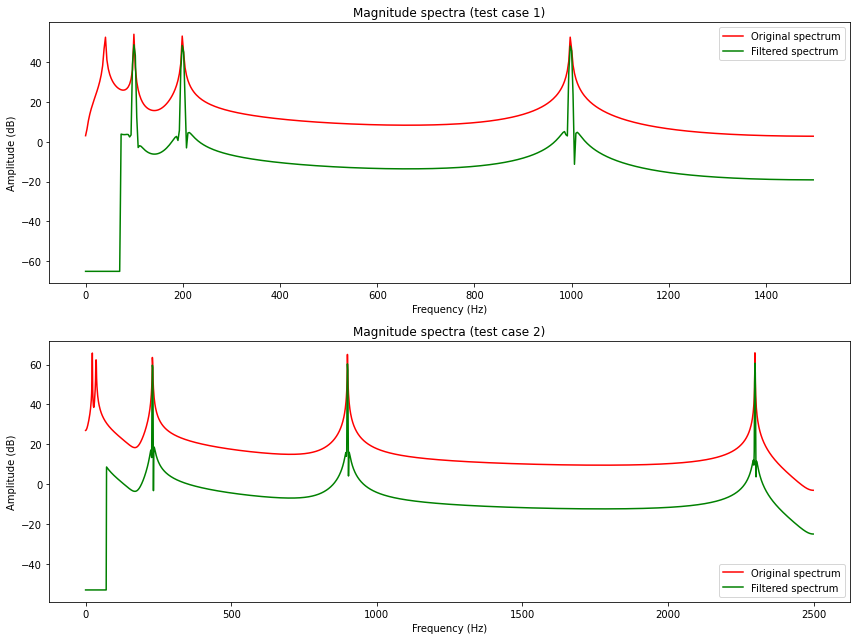

In [7]:
# E3 - 3.2: Compute the input signals proposed above and plot their magnitude spectra (x-axis in Hz), 
# call the function suppress_freq_dft_model(), and plot the magnitude spectra of the output signals

### Your code here

# Test case 1
f1 = 40                                                                                   # Freq component 1 (Hz)
f2 = 100                                                                                  # Freq component 2 (Hz)
f3 = 200                                                                                  # Freq component 3 (Hz)
f4 = 1000                                                                                 # Freq component 4(Hz)
fs = 3000                                                                                 # Sampling frequency (Hz)
N = 1024                                                                                  # FFT size 
M = 1024                                                                                  # Size of input signal
n = np.arange(M)                                                                          # Discrete time index vector
x = (np.cos(2*np.pi*f1*n/fs) + np.cos(2*np.pi*f2*n/fs) + np.cos(2*np.pi*f3*n/fs)
     + np.cos(2*np.pi*f4*n/fs))                                                           # Input signal test case 1

X = fft(x)                                                                                # Compute FFT of input signal
mX = 20 * np.log10(np.abs(X[:int(N/2)+1]))                                                # Compute positive half of magnitude spectrum (dB)

plt.figure(figsize=(12, 9))

# Plot magnitude spectra of input signal (test case 1)
plt.subplot(2,1,1)
plt.plot((fs/2.0)*np.arange((N/2)+1)/float((N/2)+1), mX, 'r', label='Original spectrum')

y = suppress_freq_dft_model(x, fs, N)                                                     # Call suppress_freq_dft_model function

Y = fft(y)                                                                                # Compute FFT of resultant time-domain signal y
mY = 20 * np.log10(np.abs(Y[:int(N/2)+1]))                                                # Compute positive half of magnitude spectrum of y

# Plot magnitude spectra of output signal (test case 1)
plt.plot((fs/2.0)*np.arange((N/2)+1)/float((N/2)+1), mY, 'g', label='Filtered spectrum')  # x-axis in Hz
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Magnitude spectra (test case 1)')

# Test case 2
f1 = 23                                                                                   # Freq component 1 (Hz)                                                                            
f2 = 36                                                                                   # Freq component 2 (Hz)
f3 = 230                                                                                  # Freq component 3 (Hz)
f4 = 900                                                                                  # Freq component 4 (Hz)
f5 = 2300                                                                                 # Freq component 5 (Hz)
fs = 5000                                                                                 # Sampling frequency (Hz)                                                                                
N = 4096                                                                                  # FFT size
M = 4096                                                                                  # Size of input signal
n = np.arange(M)                                                                          # Discrete time index vector                                                                                                                              # Input signal test case 1
x = (np.cos(2*np.pi*f1*n/fs) + np.cos(2*np.pi*f2*n/fs) + np.cos(2*np.pi*f3*n/fs)
     + np.cos(2*np.pi*f4*n/fs) + np.cos(2*np.pi*f5*n/fs))                                 # Input signal test case 2

X = fft(x)                                                                                # Compute FFT of input signal (test case 2) 
mX = 20 * np.log10(np.abs(X[:int(N/2)+1]))                                                # Compute positive half of magnitude spectrum of x

# Plot magnitude spectra of input signal (test case 2)
plt.subplot(2,1,2)
plt.plot((fs/2.0)*np.arange((N/2)+1)/float((N/2)+1), mX, 'r', label='Original spectrum')  # x-axis in Hz

y = suppress_freq_dft_model(x, fs, N)                                                     # Call suppress_freq_dft_model function

Y = fft(y)                                                                                # Compute FFT of resultant time-domain signal y
mY = 20 * np.log10(np.abs(Y[:int(N/2)+1]))                                                # Compute positive half of magnitude spectrum of y

# Plot magnitude spectra of output signal (test case 2)
plt.plot((fs/2.0)*np.arange((N/2)+1)/float((N/2)+1), mY, 'g', label='Filtered spectrum')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Magnitude spectra (test case 2)')

plt.tight_layout()
plt.show()

## Part 4 - Window-size, FFT-size, and zero-padding

The function `zp_fft_size_expt()` should take an input signal, compute three different magnitude spectra (with different parameters) and return them. 

This function should provide some insights into the effects window-size, FFT-size, and zero-padding on the spectrum of a signal. 

The input signal should be of size 512 samples, the sampling rate should be 1000Hz, and the analysis window used should be hamming. The three set of analysis parameters should be:

1. window-size = 256, FFT-size = 256 (no zero-padding)
2. window-size = 512, FFT-size = 512 (no zero-padding)
2. window-size = 256, FFT-size = 512 (zero-padding of 256 samples)

Use `dftAnal()` to obtain the positive half of the magnitude spectrum (in dB). Return the 3 magnitude spectra in dB. 


In [8]:
# E3 - 4.1: Complete the function zp_fft_size_expt()

def zp_fft_size_expt(x, window_size=[256, 512, 256], FFT_size=[256, 512, 512]):
    """compute magnitude spectra of x with different window sizes and FFT sizes.
    
    Args:
        x (np.array): input signal (512 samples long)
        
    Returns:
        list with magnitude spectra (np.array)
    """
    
    ### Your code here 
    
    # First setting
    w1 = get_window('hamming', window_size[0])                         # Compute window 
    N1 = FFT_size[0]                                                   # Get FFT size
    x1 = x[:w1.size]                                                   # Get a fragment of the input signal of same size as window
    mX1, pX1 = dftAnal(x1, w1, N1)                                     # Compute the DFT of the input signal with the analysis window 1

    # Second setting
    w2 = get_window('hamming', window_size[1])                         # Compute window 
    N2 = FFT_size[1]                                                   # Get FFT size
    x2 = x[:w2.size]                                                   # Get a fragment of the input signal of same size as window
    mX2, pX2 = dftAnal(x2, w2, N2)                                     # Compute the DFT of the input signal with the analysis window 2
    
    # Third setting
    w3 = get_window('hamming', window_size[2])                         # Compute window 
    N3 = FFT_size[2]                                                   # Get FFT size
    x3 = x[:w3.size]                                                   # Get a fragment of the input signal of same size as window
    mX3, pX3 = dftAnal(x3, w3, N3)                                     # Compute the DFT of the input signal with the analysis window 3
    
    return [mX1, mX2, mX3]                                             # Return list with the 3 magnitude spectra


Test cases for the function `zp_fft_size_expt()`:

_Test case 1:_ Use as input `x = .2*np.cos(2*np.pi*200*n)+.2*np.cos(2*np.pi*400*n)` where `n=np.arange(512)/fs` and the sampling rate `fs=1000`. Use the default arguments for `window_size` and `FFT_size`. Call the function with `mag_spectra = zp_fft_size_expt(x)`

To understand better, plot the output of `dftAnal()` for each case on a common frequency axis with different colors. You will see that `mag_spectra[2]` is the interpolated version of `mag_spectra[0]` (zero-padding leads to interpolation of the DFT). You will also observe that the 'mainlobe' of the magnitude spectrum in `mag_spectra[1]` will be narrower than that in `mag_spectra[0]` and `mag_spectra[2]`. This shows that having a longer window leads to a narrower mainlobe with better frequency resolution and less spreading of the energy of the sinusoid. 

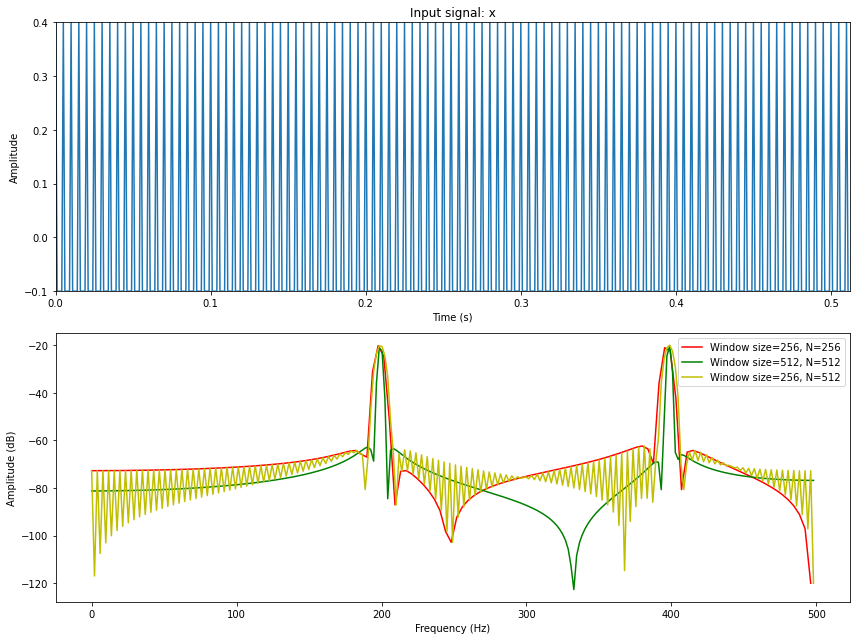

In [9]:
# E3 - 4.2: Compute, plot, and play the input signal proposed above, call the function zp_fft_size_expt(), and plot 
# the outputs

### Your code here

# Test case 1
fs = 1000                                                              # Sampling rate
M = 512                                                                # Length of input signal
n = np.arange(M)/fs                                                    # Discrete time vector
x = .2*np.cos(2*np.pi*200*n)+.2*np.cos(2*np.pi*400*n)                  # Input signal          

plt.figure(figsize=(12, 9))

# Plot input signal
plt.subplot(2,1,1)
plt.plot(n, x)
plt.axis([0, M/float(fs), min(x), max(x)])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Input signal: x')

# Play input signal
import IPython.display as ipd
ipd.display(ipd.Audio(data=x, rate=fs))

# Call zp_fft_size_expt()
mag_spectra = zp_fft_size_expt(x)

# Plot magnitude spectra in the same plot, x-axis in Hz
N1 = mag_spectra[0].size
plt.subplot(2,1,2)
plt.plot((fs/2.0)*np.arange(N1)/float(N1), mag_spectra[0], 'r', label='Window size=256, N=256')
N2 = mag_spectra[1].size
plt.plot((fs/2.0)*np.arange(N2)/float(N2), mag_spectra[1], 'g', label='Window size=512, N=512')
N3 = mag_spectra[2].size
plt.plot((fs/2.0)*np.arange(N3)/float(N3), mag_spectra[2], 'y', label='Window size=256, N=512')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')

plt.tight_layout()
plt.show()


In [ ]:
# E3 - 4.3: Explain the results of Part 4. If we were to estimate the frequency of the sinusoid using its DFT, 
# a first principles approach is to choose the frequency value of the bin corresponding to the maximum in the 
# DFT magnitude spectrum. If you were to take this approach, which of the magnitude spectra will give you a 
# better estimate of the frequency of the sinusoid? Comment and discuss.
"""
If we need to estimate the frequency of the sinusoid by using its DFT, we need good frequency resolution. Therefore,
the better estimate would be the one using a bigger window size, that is, the green plot: mag_spectra[1] with Window
size=512 and N=512). The reason is that since the main lobe of the magnitude spectrum is narrower (the more similar 
to a delta function the better for the purpose of estimating the frequency), it provides better frequency resolution.
On the other hand, although the FFT size used here is the same as in the yellow plot (mag_spectra[2] with Window 
size=256 and N=512), in the latter (yellow plot), the interpolation that is generated as a result of the zero-padding
operation is quite artificial, so in regards to this it is also preferred to use the second setting (mag_spectra[1]).
In summary, the best approach overall would the second one (Window size=512 and N=512).
"""